### Visualize the distribution of data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from helper_function import process
from helper_function import uniqueValue
from helper_function import visualizeDist

sns.set_style("whitegrid")

%matplotlib inline

# Process the data

### Load the dataset

In [2]:
# read training and test set
train_id, train_total = process('./data/act_train.csv')
# test_id, test_total = process('./data/act_test.csv')

In [3]:
# training set shapes
print(train_total.shape)

(2197291, 59)


In [4]:
print("Negative Data: ", len(train_total[train_total['outcome'] == 0]))
print("Positive Data: ", len(train_total[train_total['outcome'] == 1]))

Negative Data:  1221794
Positive Data:  975497


In [5]:
print(sorted(train_total.columns))

['activity_category', 'activity_day', 'activity_isWeekend', 'activity_month', 'activity_year', 'char_1', 'char_10', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_2', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_3', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37', 'char_38', 'char_39', 'char_4', 'char_40', 'char_41', 'char_42', 'char_43', 'char_44', 'char_45', 'char_46', 'char_47', 'char_48', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'group_1', 'outcome', 'people_day', 'people_isWeekend', 'people_month', 'people_year']


### Visualize the characteristics of the dataset

#### Unique values for each feature

activity_category 7


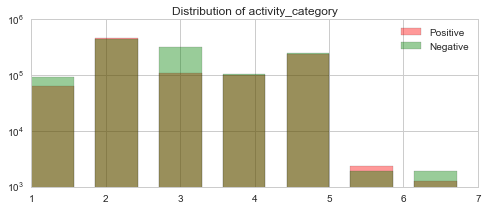

char_1 52


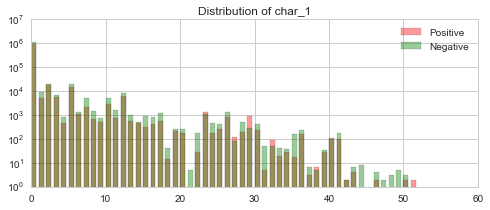

char_2 33


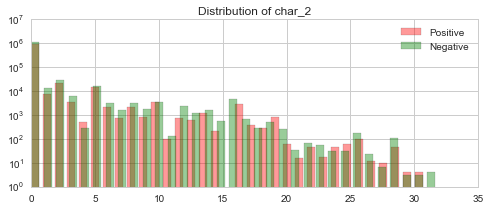

char_3 12


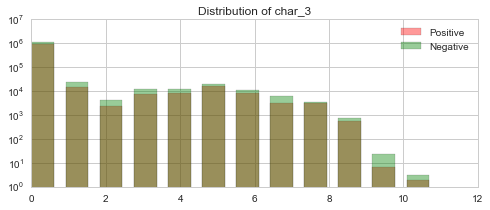

char_4 8


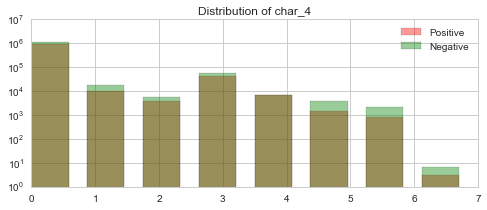

char_5 8


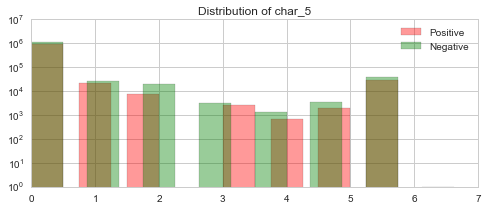

char_6 6


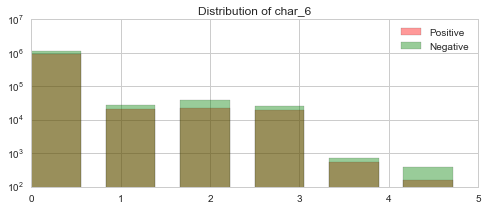

char_7 9


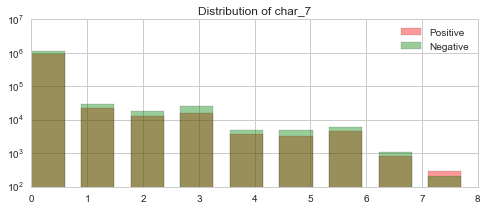

char_8 19


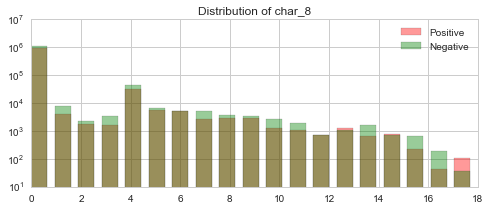

char_9 20


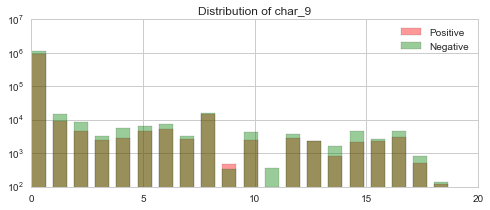

char_10 6516


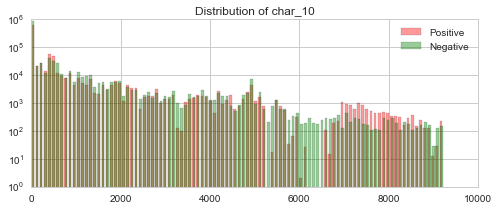

activity_year 2


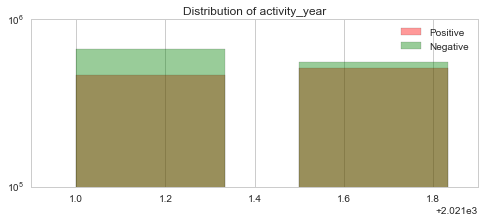

activity_month 12


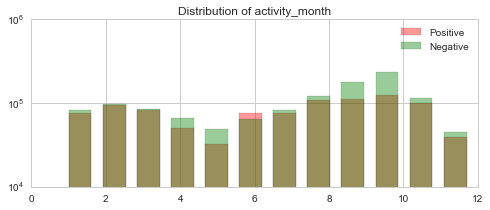

activity_day 31


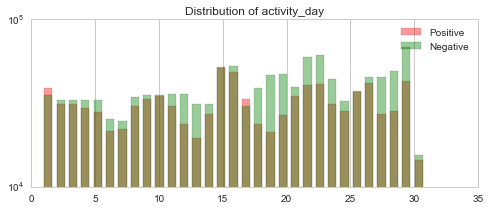

activity_isWeekend 2


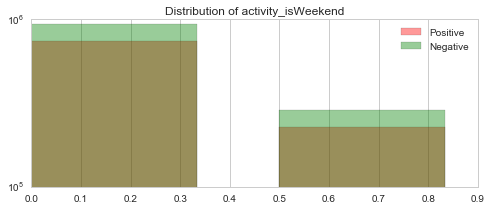

char_11 2


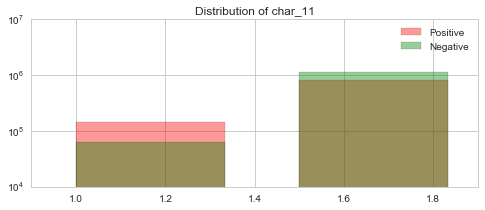

group_1 29899


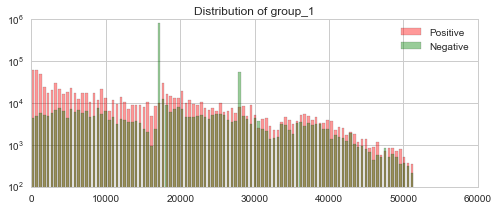

char_12 3


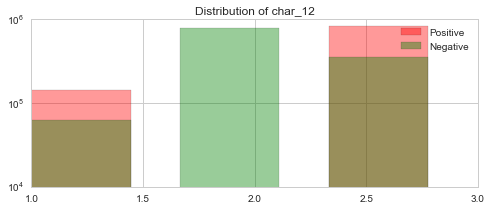

char_13 43


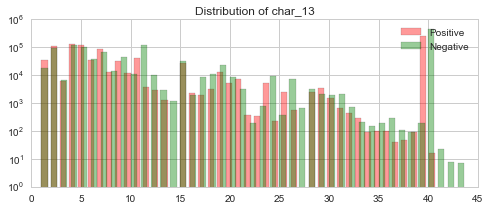

char_14 25


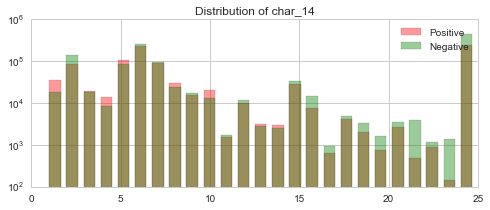

char_15 9


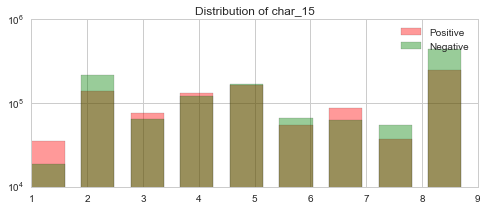

char_16 7


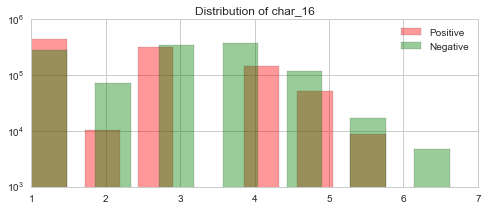

char_17 25


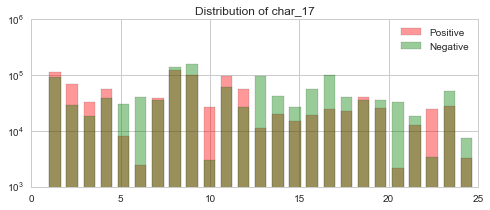

char_18 8


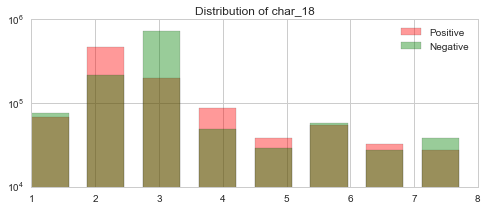

char_19 9


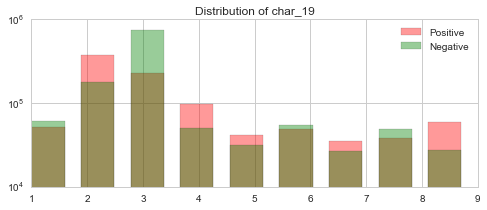

char_20 2


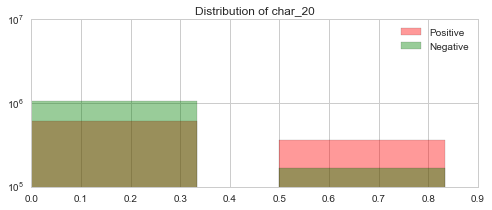

char_21 2


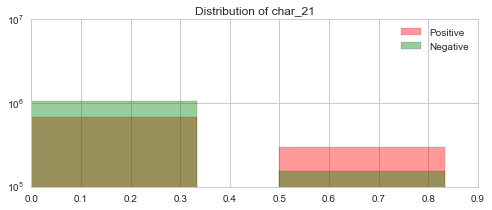

char_22 2


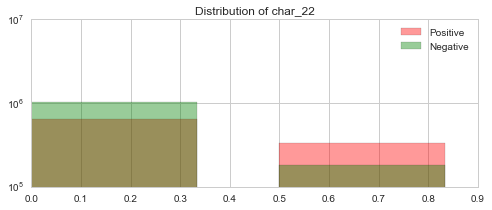

char_23 2


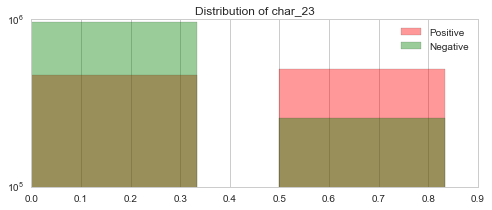

char_24 2


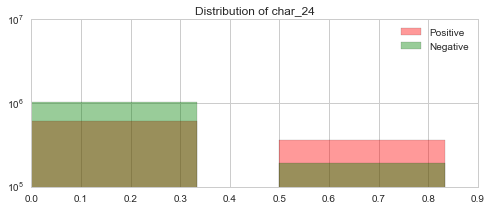

char_25 2


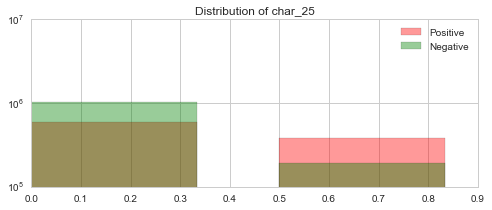

char_26 2


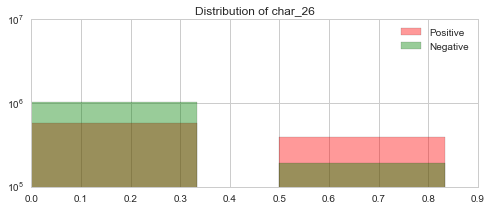

char_27 2


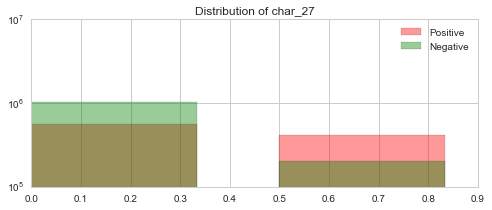

char_28 2


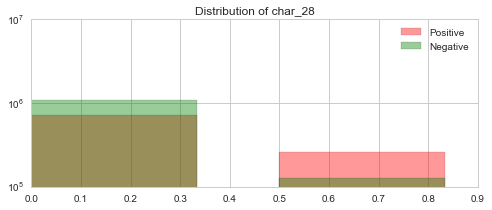

char_29 2


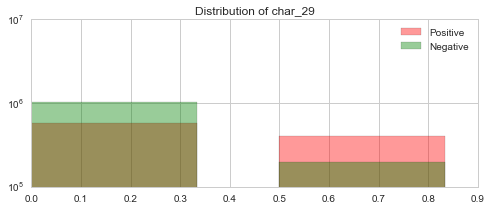

char_30 2


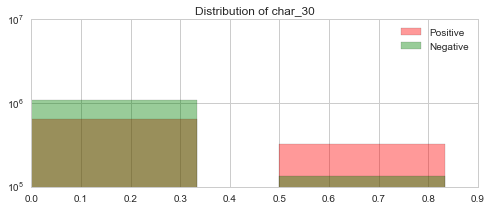

char_31 2


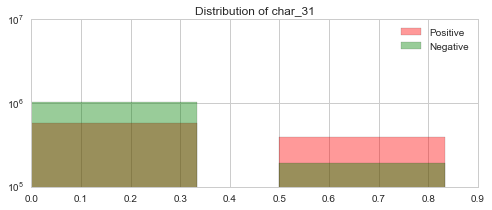

char_32 2


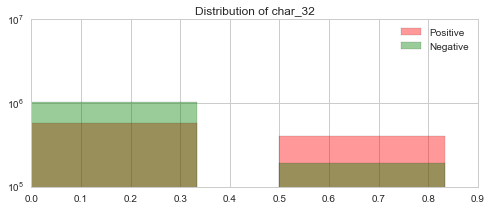

char_33 2


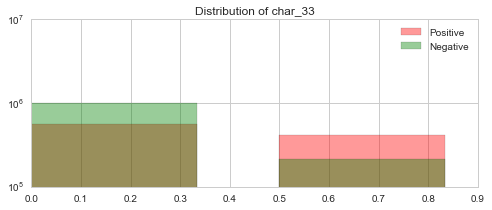

char_34 2


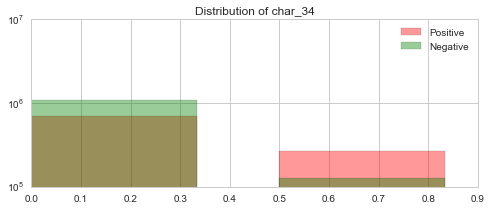

char_35 2


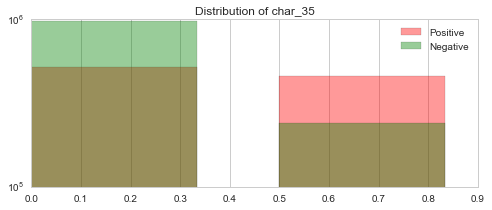

char_36 2


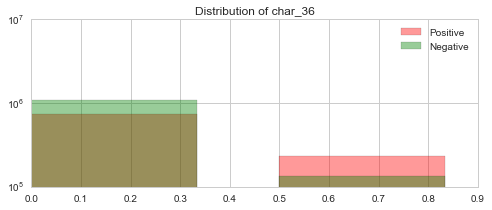

char_37 2


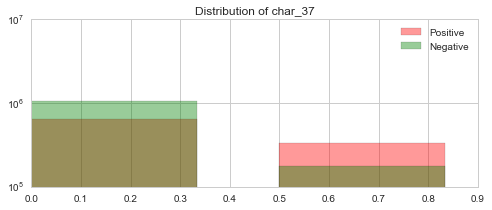

char_38 2


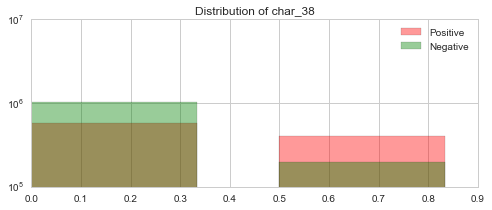

char_39 2


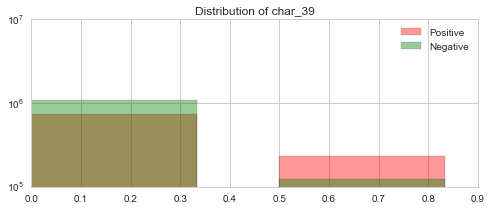

char_40 2


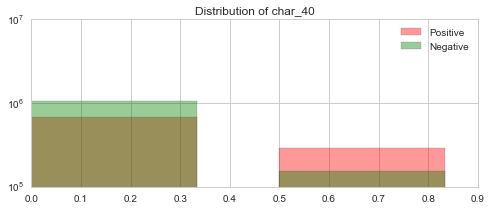

char_41 2


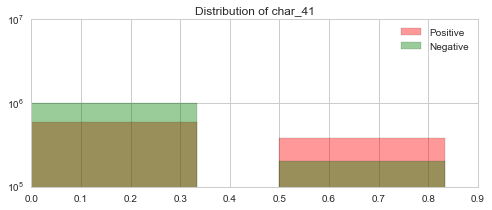

char_42 2


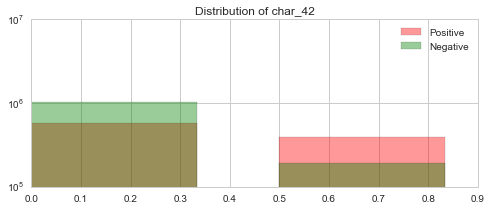

char_43 2


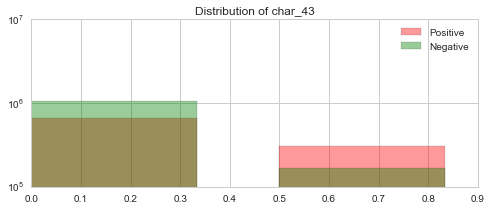

char_44 2


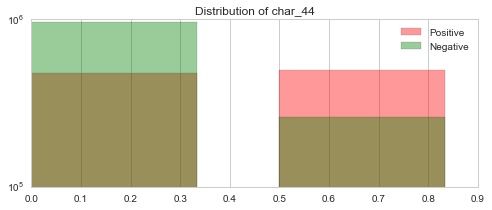

char_45 2


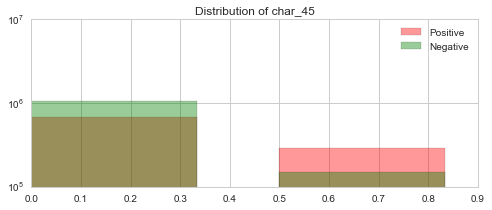

char_46 2


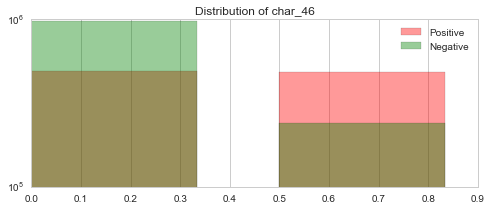

char_47 2


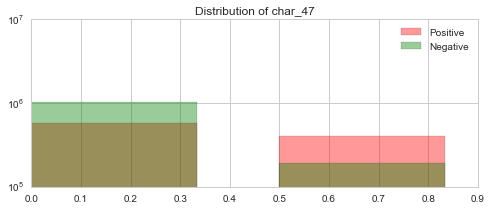

char_48 101


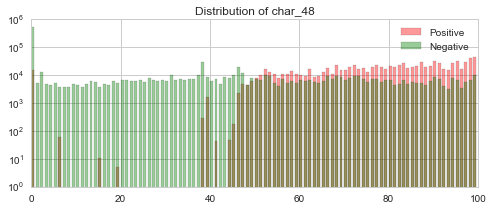

people_year 4


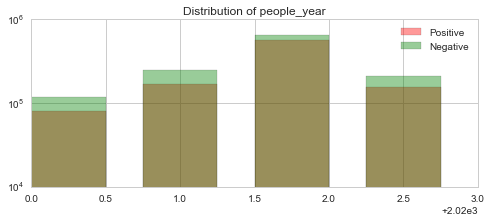

people_month 12


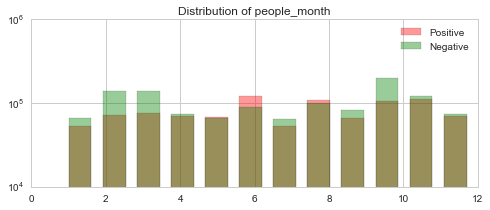

people_day 31


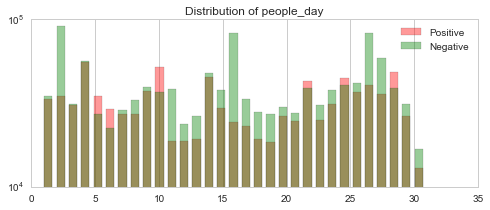

people_isWeekend 2


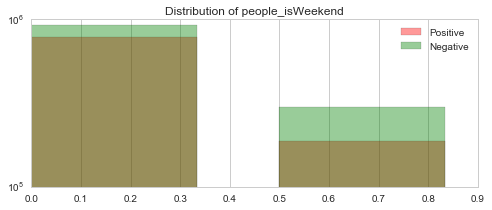

In [25]:
uniqueValue(train_total, threshold=2)

#### Histogram

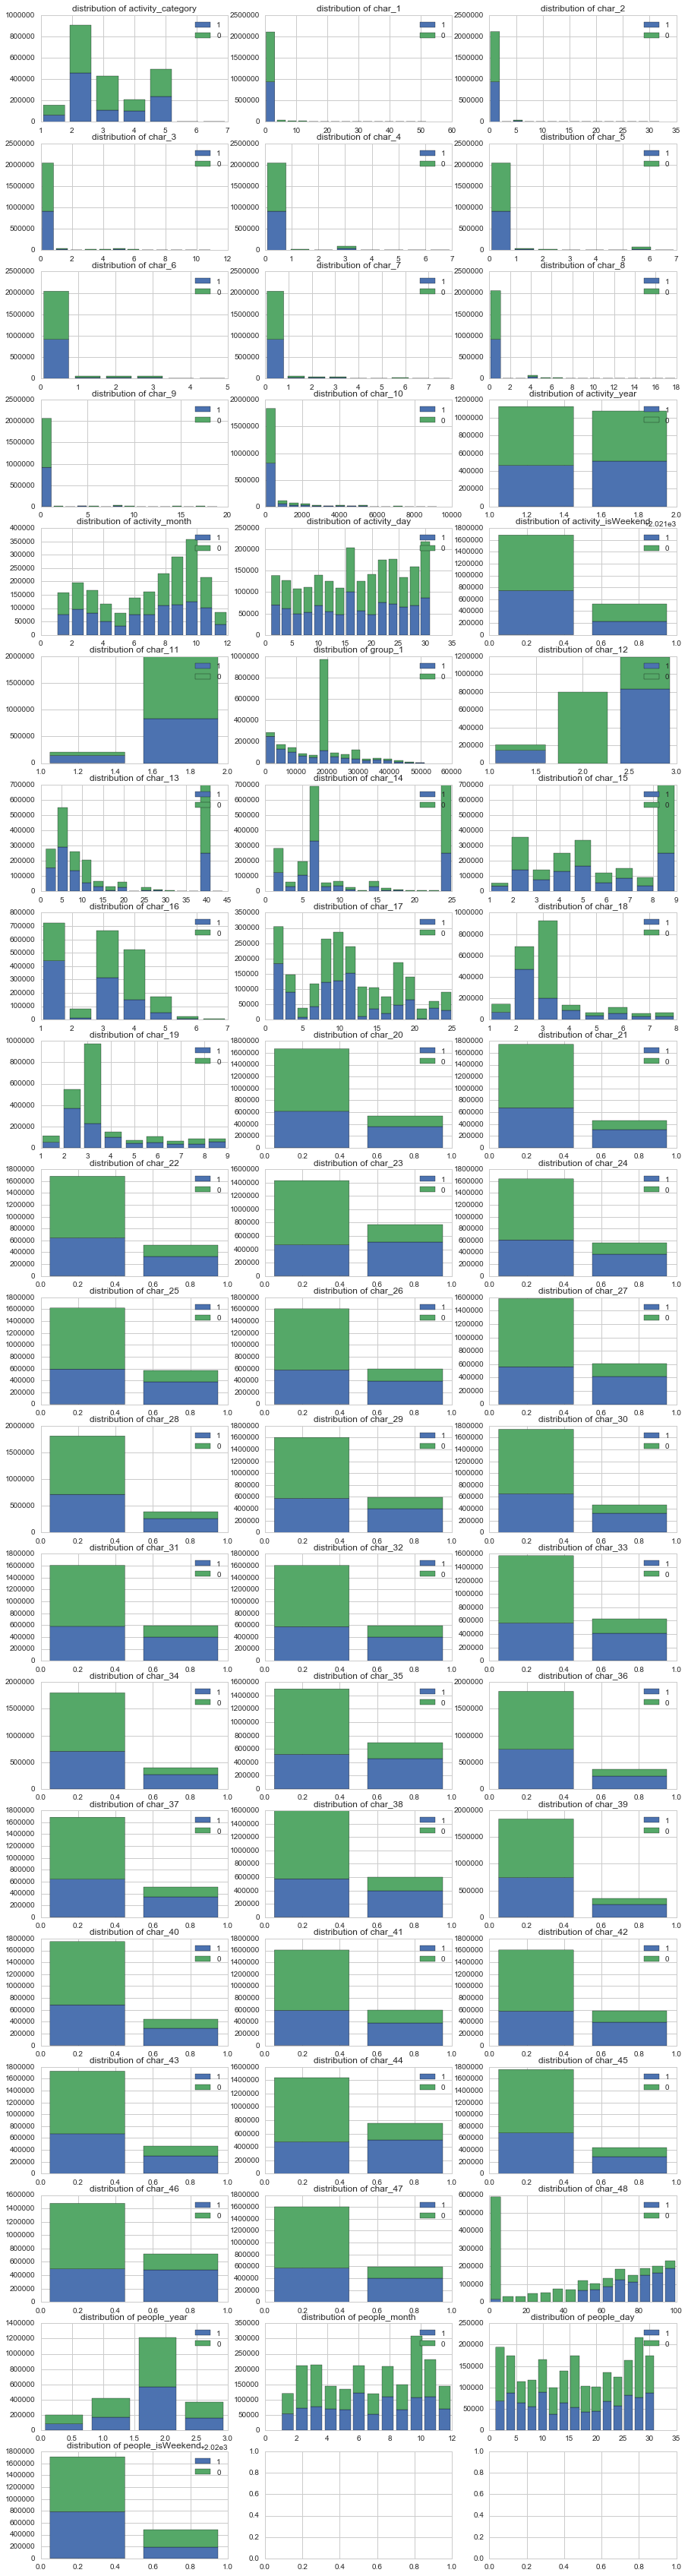

In [5]:
columns = train_total.columns
columns = [i for i in columns if i != 'outcome']
fig, ax = plt.subplots(nrows=int(len(columns) // 3) + 1, ncols=3, figsize=(15, 60))
for index, column in enumerate(columns):
    bins = min(len(train_total[column].unique()), 15)
    ax[index // 3, index % 3].hist([train_total.loc[train_total.outcome == 1][column],
                                    train_total.loc[train_total.outcome == 0][column]],
                                   histtype='barstacked', label=[1,0], bins=bins)
    ax[index // 3, index % 3].legend()
    ax[index // 3, index % 3].set_title('distribution of {}'.format(column))
plt.show()

#### Boxplot

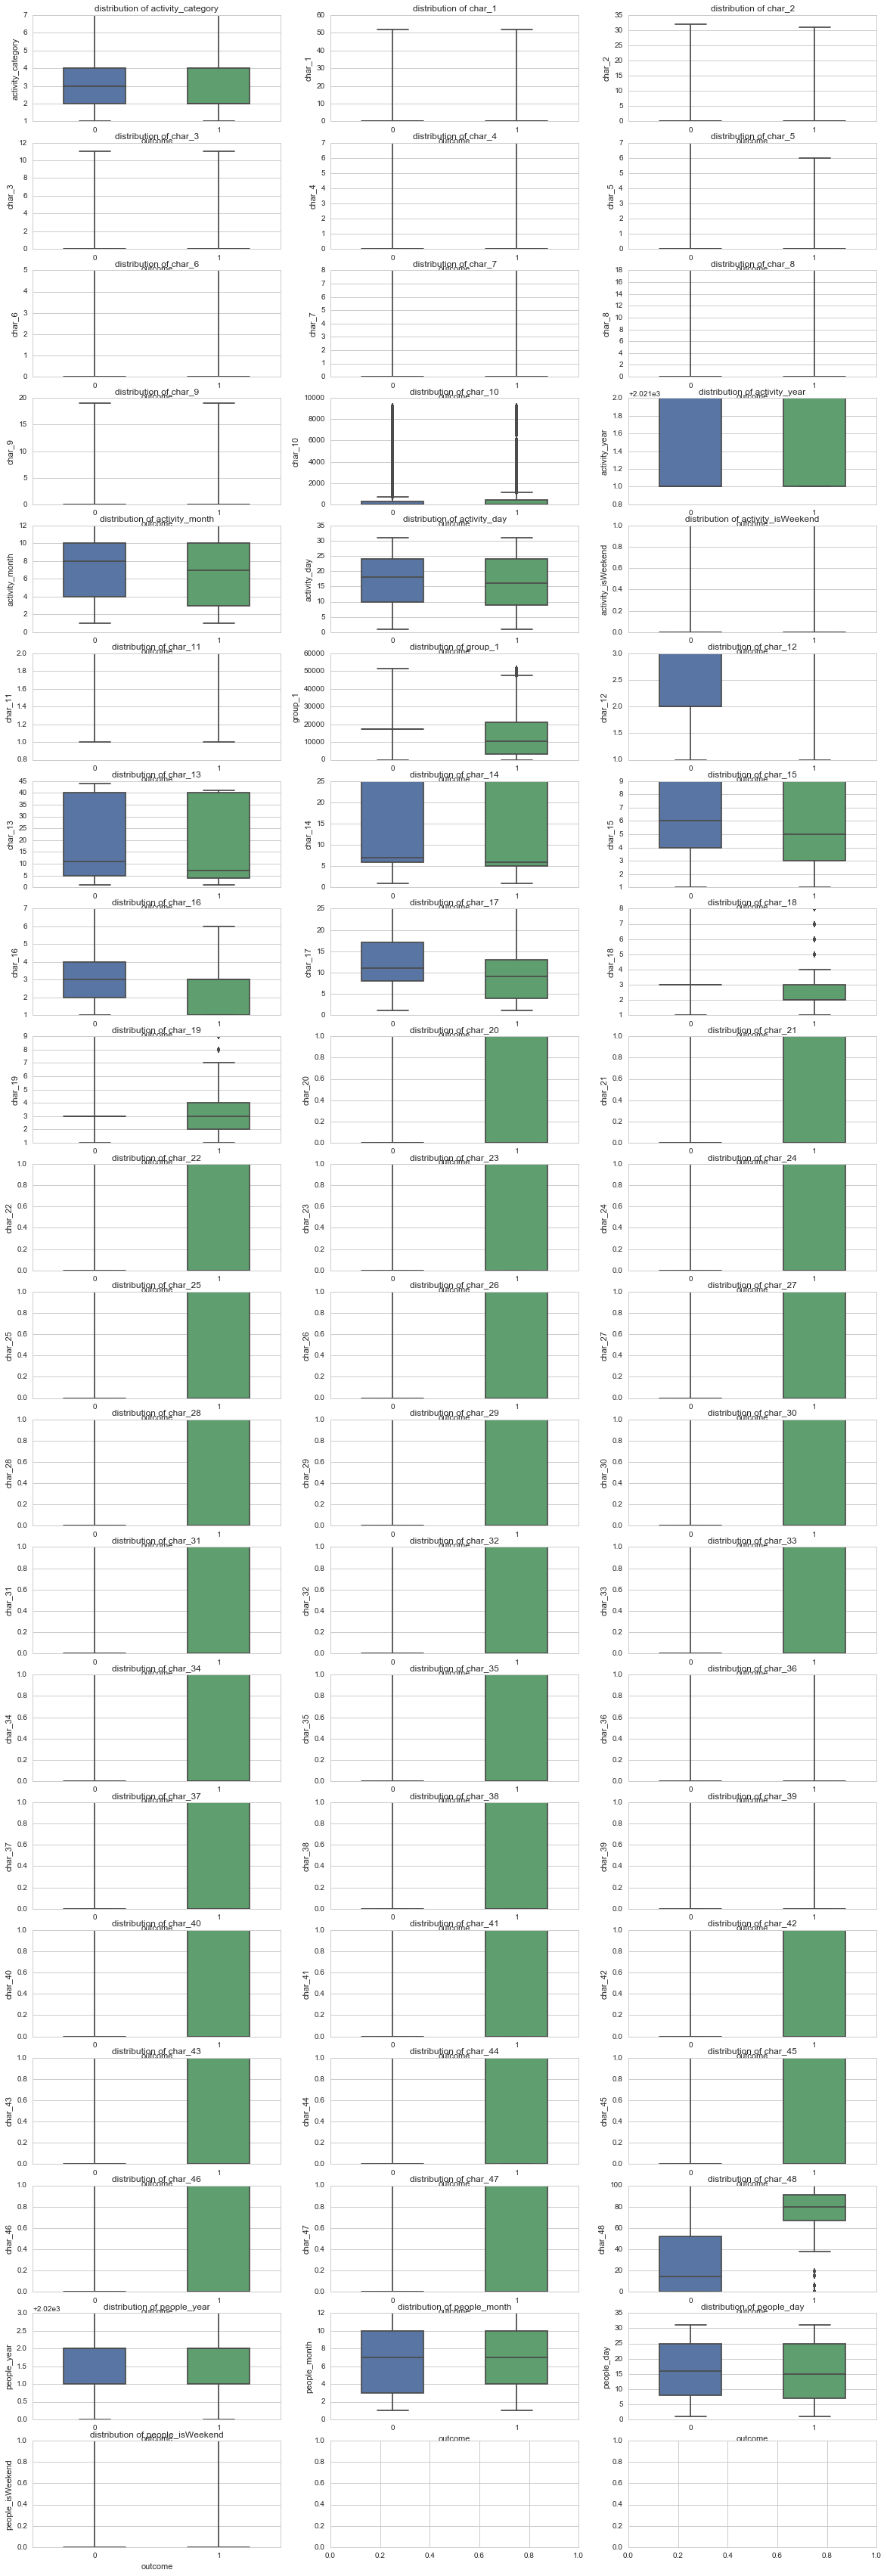

In [27]:
columns = train_total.columns
columns = [i for i in columns if i != 'outcome']
fig, ax = plt.subplots(nrows=int(len(columns) // 3) + 1, ncols=3, figsize=(20, 60))
for index, column in enumerate(columns):
    sns.boxplot(x='outcome', y=column, data=train_total, width=0.5, ax=ax[index // 3, index % 3])
    ax[index // 3, index % 3].legend()
    ax[index // 3, index % 3].set_title('distribution of {}'.format(column))
plt.show()

In [7]:
import gc
gc.collect()

0

#### Histogram (Partial Data)

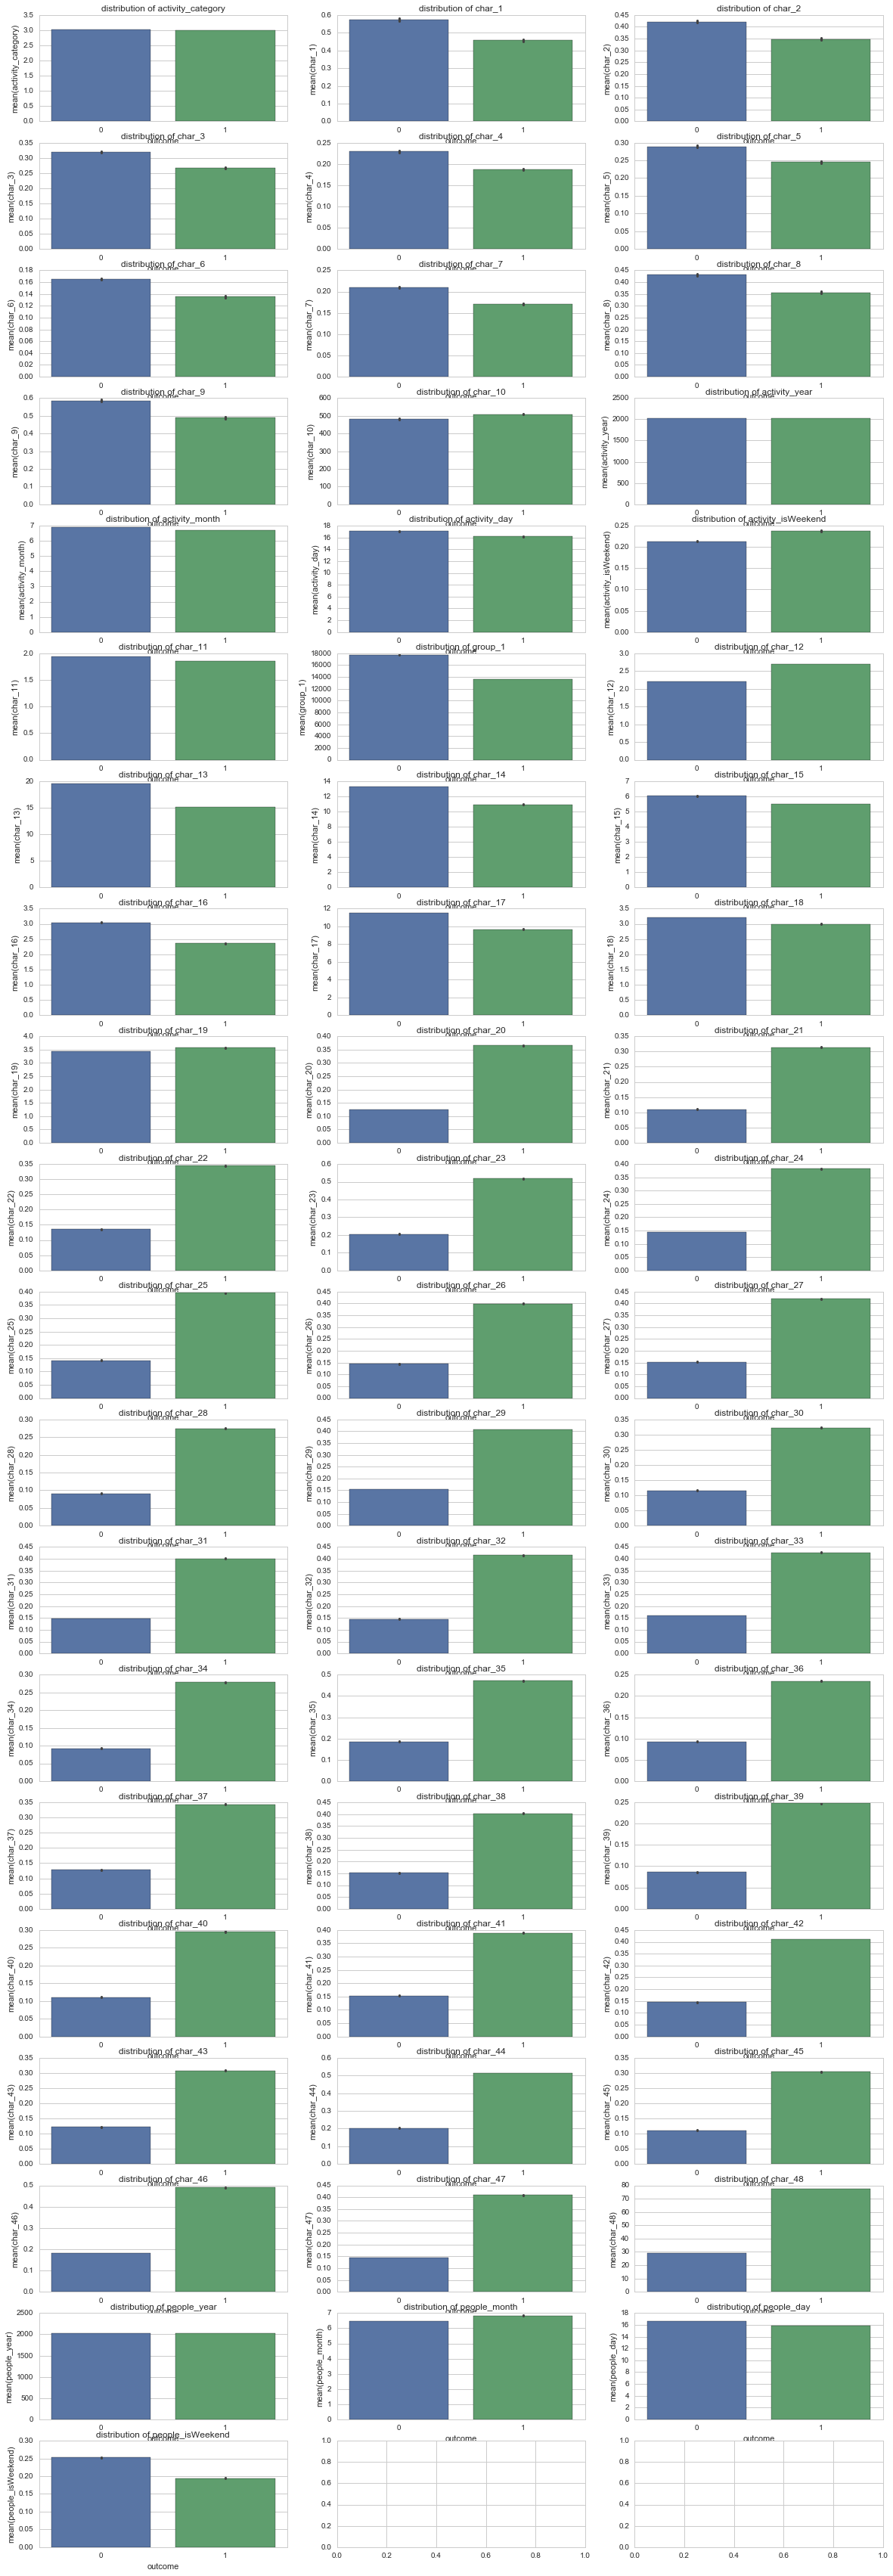

In [8]:
columns = train_total.columns
columns = [i for i in columns if i != 'outcome']
fig, ax = plt.subplots(nrows=int(len(columns) // 3) + 1, ncols=3, figsize=(20, 60))
for index, column in enumerate(columns):
    sns.barplot(x='outcome', y=column, data=train_total[: 1000000], ax=ax[index // 3, index % 3])
    ax[index // 3, index % 3].legend()
    ax[index // 3, index % 3].set_title('distribution of {}'.format(column))
plt.show()